# SI 618 - Homework #6: Machine Learning 1

Version 2023.11.01.1.CT

In this homework exercise you will apply the machine learning techniques we've covered so far: 
machine learning pipelines, dimension reduction, and clustering.

You will be using the [customer personality analysis dataset](https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis) from Kaggle.

**NOTE:** This is a fairly involved homework assignment and we *strongly* urge you to not leave this to the last minute.
We suggest that you try to work on this assignment over several days.

A reminder (from the syllabus):
> Unless stated otherwise in an assignment, you are permitted to use generative AI (e.g. ChatGPT, Copilot, etc.) but you must indicate  that you did so in the work that you submit.  **If you fail to 
>  disclose your use of generative AI you will receive a grade of
> zero on the assignment**.

### The total score for this assignment will be 100 points, consisting of:
- 10 pt: Overall quality of spelling, grammar, punctuation, etc. of written sentences. ([Guide](https://drive.google.com/file/d/1L0P7xJwjUGBvyb49mL3dw1Bt7hzRTiTl/view ))
- 10 pt: Code is written in [PEP 8](https://www.python.org/dev/peps/pep-0008/) style.
- 80 pt: Homework questions. 

In [58]:
MY_UNIQNAME = "mattcalc"  # fill this in with your uniqname

#### **Co-Pilot was used to assist with this assignment**

## Task 1 (10 points):
Perform exploratory data analyses on the variables in this dataset.  Your work should include both
numerical **and** graphical overviews of the data.  Explain your findings.  

In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# importing sklearn modules
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.manifold import TSNE

warnings.filterwarnings("ignore")

In [60]:
customer_df = pd.read_csv("../data/marketing_campaign.csv", delimiter="\t")
customer_df.columns = customer_df.columns.str.lower()

In [61]:
customer_df.head()

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,...,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,z_costcontact,z_revenue,response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [62]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   2240 non-null   int64  
 1   year_birth           2240 non-null   int64  
 2   education            2240 non-null   object 
 3   marital_status       2240 non-null   object 
 4   income               2216 non-null   float64
 5   kidhome              2240 non-null   int64  
 6   teenhome             2240 non-null   int64  
 7   dt_customer          2240 non-null   object 
 8   recency              2240 non-null   int64  
 9   mntwines             2240 non-null   int64  
 10  mntfruits            2240 non-null   int64  
 11  mntmeatproducts      2240 non-null   int64  
 12  mntfishproducts      2240 non-null   int64  
 13  mntsweetproducts     2240 non-null   int64  
 14  mntgoldprods         2240 non-null   int64  
 15  numdealspurchases    2240 non-null   i

In [63]:
customer_df.dt_customer = pd.to_datetime(
    customer_df.dt_customer, format="%d-%m-%Y"
)

In [64]:
customer_df.isna().any(axis=0)

id                     False
year_birth             False
education              False
marital_status         False
income                  True
kidhome                False
teenhome               False
dt_customer            False
recency                False
mntwines               False
mntfruits              False
mntmeatproducts        False
mntfishproducts        False
mntsweetproducts       False
mntgoldprods           False
numdealspurchases      False
numwebpurchases        False
numcatalogpurchases    False
numstorepurchases      False
numwebvisitsmonth      False
acceptedcmp3           False
acceptedcmp4           False
acceptedcmp5           False
acceptedcmp1           False
acceptedcmp2           False
complain               False
z_costcontact          False
z_revenue              False
response               False
dtype: bool

In [65]:
customer_df.columns

Index(['id', 'year_birth', 'education', 'marital_status', 'income', 'kidhome',
       'teenhome', 'dt_customer', 'recency', 'mntwines', 'mntfruits',
       'mntmeatproducts', 'mntfishproducts', 'mntsweetproducts',
       'mntgoldprods', 'numdealspurchases', 'numwebpurchases',
       'numcatalogpurchases', 'numstorepurchases', 'numwebvisitsmonth',
       'acceptedcmp3', 'acceptedcmp4', 'acceptedcmp5', 'acceptedcmp1',
       'acceptedcmp2', 'complain', 'z_costcontact', 'z_revenue', 'response'],
      dtype='object')

#### Plots

In [66]:
# for column in customer_df.columns:
#     sns.histplot(customer_df[column])
#     plt.title("Histogram of " + column)
#     plt.show()

histogram_cols = [
    "year_birth",
    "education",
    "marital_status",
    "income",
    "recency",
    "mntwines",
    "mntfruits",
    "mntmeatproducts",
    "mntfishproducts",
    "mntsweetproducts",
    "mntgoldprods",
    "numdealspurchases",
    "numwebpurchases",
    "numcatalogpurchases",
    "numstorepurchases",
    "numwebvisitsmonth",
]

# for column in histogram_cols:
#     sns.histplot(customer_df[column])
#     plt.title("Histogram of " + column)
#     plt.show()

In [67]:
def basic_histogram(column):
    plot = sns.histplot(column)
    plt.title("Histogram of " + column.name)
    print(column.describe())
    return plot

count    2240.000000
mean     1968.805804
std        11.984069
min      1893.000000
25%      1959.000000
50%      1970.000000
75%      1977.000000
max      1996.000000
Name: year_birth, dtype: float64


<Axes: title={'center': 'Histogram of year_birth'}, xlabel='year_birth', ylabel='Count'>

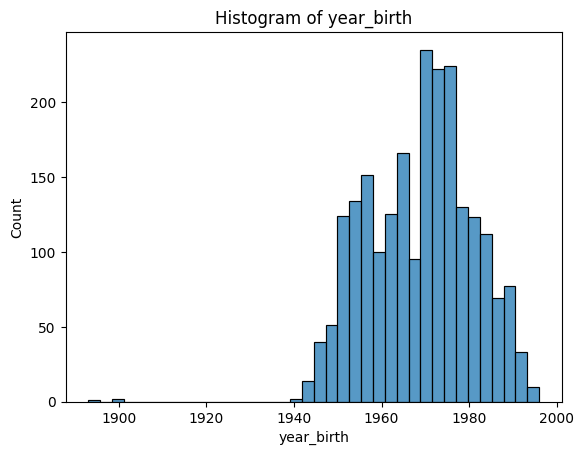

In [68]:
basic_histogram(customer_df["year_birth"])

count           2240
unique             5
top       Graduation
freq            1127
Name: education, dtype: object


<Axes: title={'center': 'Histogram of education'}, xlabel='education', ylabel='Count'>

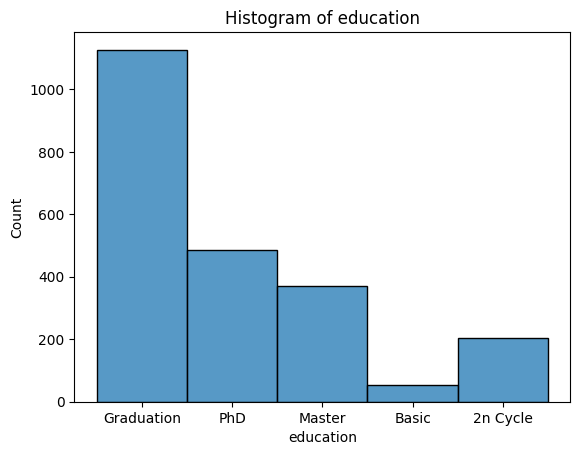

In [69]:
basic_histogram(customer_df["education"])

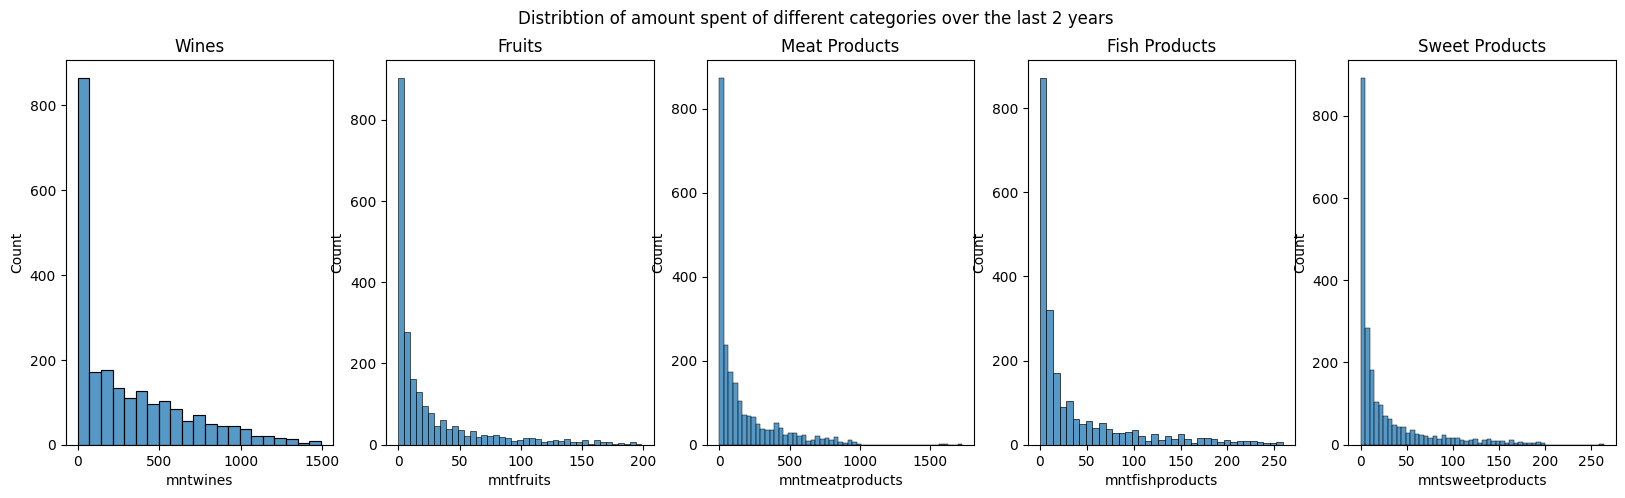

In [70]:
fig, axes = plt.subplots(1, 5, figsize=(20, 5))
fig.suptitle(
    "Distribtion of amount spent of different categories over the last 2 years"
)
sns.histplot(customer_df["mntwines"], ax=axes[0])
axes[0].set_title("Wines")
sns.histplot(customer_df["mntfruits"], ax=axes[1])
axes[1].set_title("Fruits")
sns.histplot(customer_df["mntmeatproducts"], ax=axes[2])
axes[2].set_title("Meat Products")
sns.histplot(customer_df["mntfishproducts"], ax=axes[3])
axes[3].set_title("Fish Products")
sns.histplot(customer_df["mntsweetproducts"], ax=axes[4])
axes[4].set_title("Sweet Products")
plt.show()

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: income, dtype: float64


<Axes: title={'center': 'Histogram of income'}, xlabel='income', ylabel='Count'>

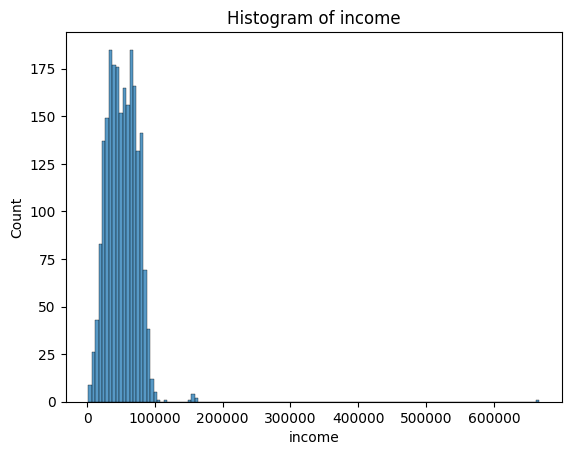

In [71]:
basic_histogram(customer_df["income"])

count        2240
unique          8
top       Married
freq          864
Name: marital_status, dtype: object


<Axes: title={'center': 'Histogram of marital_status'}, xlabel='marital_status', ylabel='Count'>

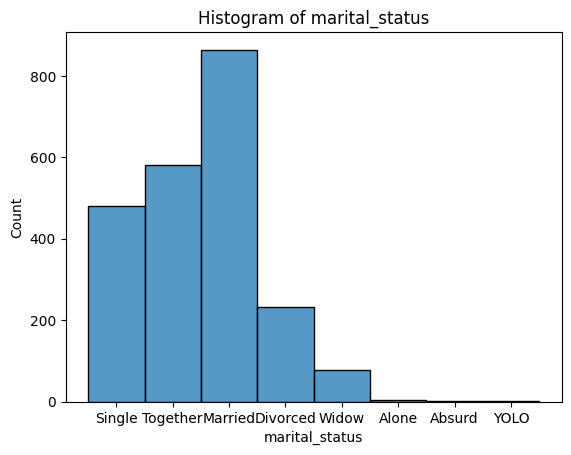

In [72]:
basic_histogram(customer_df["marital_status"])

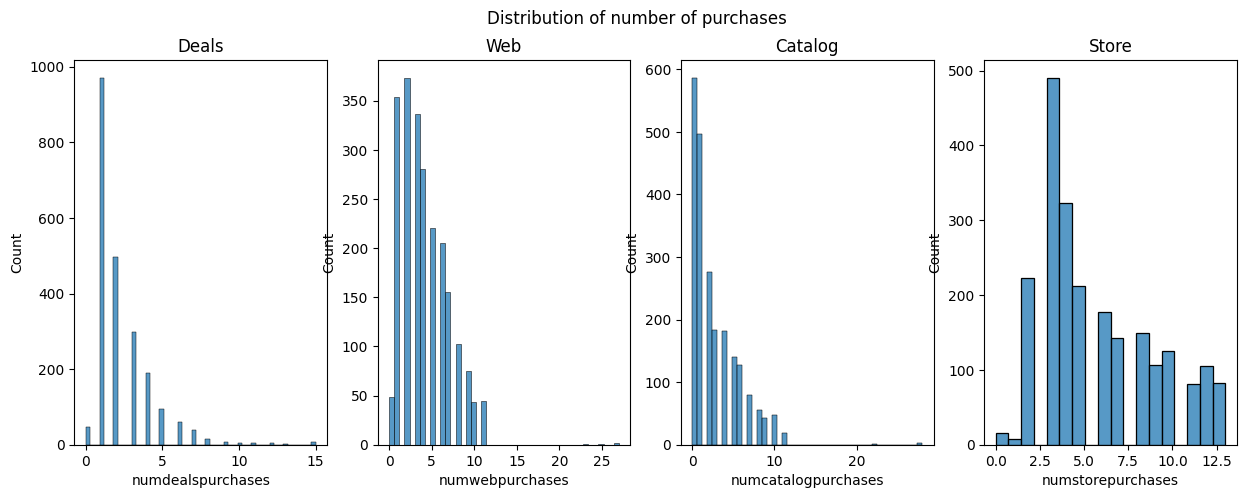

In [73]:
fig, axes = plt.subplots(1, 4, figsize=(15, 5))
fig.suptitle("Distribution of number of purchases")
sns.histplot(customer_df["numdealspurchases"], ax=axes[0])
axes[0].set_title("Deals")
sns.histplot(customer_df["numwebpurchases"], ax=axes[1])
axes[1].set_title("Web")
sns.histplot(customer_df["numcatalogpurchases"], ax=axes[2])
axes[2].set_title("Catalog")
sns.histplot(customer_df["numstorepurchases"], ax=axes[3])
axes[3].set_title("Store")
plt.show()


# Data Overview
### Null Values
The dataset has 2240 rows and 29 columns. There is one column with null values `income`


#### year_birth
The year_birth column has a minimum value of 1893 and a maximum value of 2001. The mean is 1968.8 and the median is 1970. The standard deviation is 11.98. The distribution is roughly normal and there are a few outliers on the left side of the distribution around 1900.

#### education
There are 5 value in the dataset for education. The most common value is  graduation. The least common value was Basic. 

It is important to note that there is a 2n Cycle value which corresponds to graduate or master level studies. 

#### Amount spent in the last 2 years
There are 5 variables which represent the amount which the customers have spent on different categories over the last 2 years:
- mntwines
- mntfruits
- mntmeatproducts
- mntfishproducts
- mntsweetproducts

The distributions for each category were graphed and found to be very similar. The distribtion for each of the categories is skewed to the right, with the majority of customers spending around 0, and the number of customers reduces and the amount spent increases. 

#### Income
The income column has a minimum value of 1730 and a maximum value of 666666. The mean is 52247.25 and the median is 51381.5. The standard deviation is 25173.08. The outlier at 666,666 is assumed to not be an exact value is is likely a data entry error, or a value greater than 666,666 which exceeds the maximum income of the system. Dropping this value will increase the accuracy of models which use income.

The distribution of incomes appears to be roughly normal with a slight right skew. There is a clustering of incomes  outside of the main distribution around 150,000.

#### acceptedcmp
Acceptedmp1-5 and response, columns indicate the period in which the customers accepted a campaign. The columns are binary and indicate whether the customer accepted the campaign or not. The majority of customers did not accept the campaign.

#### Marital Status
The majority of customers are married. The most common values are as follows:
- Married 0.48
- Together 0.25
- Single 0.15
- Divorced 0.11
- Widow 0.01

It is important to note that there are a couple customers with unexpected values such as:
- Alone
- Absurd
- YOLO

### Number of Purchases
There are 4 columns which indicate the number of purchases the customer has made in the last 2 years:
- numdealspurchases
- numcatalogpurchases
- numstorepurchases
- numwebpurchases

The distributions of these 4 variables have been shown in histograms.

The distributions are all skewed to the right. Web, Catalogue, and Deals purchases all show outliers on the far right of the distribution.




## Task 2 (1 point): Drop all columns that have constant values.

In [74]:
# Loop through columns and drop any that only have 1 unique value (constants)
# Nulls are not dropped as constants liekly would not have null values
for column in customer_df.columns:
    if customer_df[column].nunique(dropna=False) == 1:
        customer_df.drop(column, axis=1, inplace=True)


        print(f"dropped {column} because it only has 1 unique value")

dropped z_costcontact because it only has 1 unique value
dropped z_revenue because it only has 1 unique value


Columns `z_costcontact` and `z_revenue` were dropped as they had constant values.

## Task 3 (1 point):
Create a new variable `In_Relationship` whose value is 1 if the value of `Marital_Status` is "Married" or "Together" and 0 otherwise.  Drop the `Marital_Status` column.

In [75]:
# map 'married' and 'together' to 1, everything else to 0
customer_df["in_relationship"] = customer_df.copy().marital_status.apply(
    lambda x: 1 if x in ["Married", "Together"] else 0
)


customer_df.drop("marital_status", axis=1, inplace=True)
customer_df.columns

Index(['id', 'year_birth', 'education', 'income', 'kidhome', 'teenhome',
       'dt_customer', 'recency', 'mntwines', 'mntfruits', 'mntmeatproducts',
       'mntfishproducts', 'mntsweetproducts', 'mntgoldprods',
       'numdealspurchases', 'numwebpurchases', 'numcatalogpurchases',
       'numstorepurchases', 'numwebvisitsmonth', 'acceptedcmp3',
       'acceptedcmp4', 'acceptedcmp5', 'acceptedcmp1', 'acceptedcmp2',
       'complain', 'response', 'in_relationship'],
      dtype='object')

## Task 4 (3 points):
Impute missing income values with the median income.  Explain your results (i.e. what the median value was, how many values were imputed, how reliable you think the median value is, etc.).

In [76]:
# median and mean income
customer_df.income.describe()

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: income, dtype: float64

In [77]:
# fills in missing income values with median income using SimpleImputer
imp = SimpleImputer(strategy="median")
customer_df.income = imp.fit_transform(customer_df[["income"]])
customer_df.income.describe()

count      2240.000000
mean      52237.975446
std       25037.955891
min        1730.000000
25%       35538.750000
50%       51381.500000
75%       68289.750000
max      666666.000000
Name: income, dtype: float64

## Missing income values
The median income value of the dataset was **51381.5**.

The missing values in the dataset for income were imputed with the median value.

The median value would be a reliable value to impute the missing values with as the distribution of income is roughly normal and the median is not affected by outliers. Since there is one large outlier at 666666 the median is a better selection than the mean.

Since the median was used, the quartiles for the dataset before and after the imputer were the same, and the median value does not affect the distribution of the data.

## Task 5 (15 points):
Use scikit-learn to conduct a linear regression that models the amount spend on wine (`MntWines`) based on `Income` and whether they are in a relationship (`In_Relationship`).  Assess how good your model is by reporting the root mean squared error (RMSE) using the test dataset from an 80-20 train-test-split of the original dataset.  Explain what your value of RMSE means, and comment on how good you think your model is based on the RMSE value means.

In [78]:
# drop the outlier from income
customer_df = customer_df[customer_df.income < 600000].reset_index(drop=True)
customer_df.income.describe()

count      2239.000000
mean      51963.554712
std       21410.672116
min        1730.000000
25%       35533.500000
50%       51381.500000
75%       68277.500000
max      162397.000000
Name: income, dtype: float64

In [79]:
# We did a stratified shuffle split to keep the distribution of in_relationship similar between the train and test sets

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)


for train_index, test_index in split.split(
    customer_df, customer_df["in_relationship"]
):
    strat_train_set = customer_df.loc[train_index]


    strat_test_set = customer_df.loc[test_index]

In [80]:
wine_y = strat_train_set["mntwines"]
wine_X = strat_train_set[["income", "in_relationship"]]

In [81]:
lr = LinearRegression()
lr.fit(wine_X, wine_y)

LinearRegression()

In [82]:
wine_predictions = lr.predict(strat_test_set[["income", "in_relationship"]])
wine_predictions

array([-3.03869668e+00,  2.51681228e+02,  2.57741986e+02,  3.43423775e+02,
        2.60848396e+02,  5.56929725e+02,  7.71374935e+02,  2.91863619e+02,
        2.05427484e+02,  2.86672053e+02,  1.25969376e+02,  4.97750175e+02,
        4.99875052e+01,  3.50711891e+02,  5.01937579e+02,  5.01019509e+02,
        2.71579630e+02,  2.62114036e+02,  5.19794006e+02,  3.59862500e+02,
        1.48252161e+02,  6.12888552e+02,  7.16237596e+01,  3.90030787e+02,
       -1.00179446e+02,  5.20804132e+02,  1.11540042e+02,  1.05218606e+02,
        6.52641911e+02,  4.42579079e+02,  5.94565078e+02,  4.26856685e+02,
        5.61839157e+02,  2.03830832e+02,  5.78250994e+02, -4.45407690e+01,
        2.17440384e+02,  3.29026492e+02,  3.64685038e+02, -7.33565235e+01,
        9.74308582e+01,  4.24146989e+02,  4.63878625e+02,  6.02119035e+02,
       -1.42032222e+00,  3.51613401e+02,  2.17646754e+02,  1.47470127e+02,
        2.75202232e+02, -8.73353686e+01,  6.88778366e+02,  5.05760853e+02,
       -1.08971623e+02,  

In [83]:
wine_predictions_df = pd.DataFrame()
wine_predictions_df["income"] = customer_df["income"].head()
wine_predictions_df["in_relationship"] = customer_df["in_relationship"].head()
wine_predictions_df["mntwines"] = customer_df["mntwines"].head()
wine_predictions_df["predicted_mntwines"] = wine_predictions[:5]
wine_predictions_df.mntwines.mean()

251.2

In [84]:
from sklearn.model_selection import cross_val_score

# Cross validatin to calculare RMSE
scores = cross_val_score(
    lr, wine_X, wine_y, scoring="neg_mean_squared_error", cv=10
)
rmse_scores = np.sqrt(-scores)
np.mean(rmse_scores)

243.33396573389982

# Predicting Wine Spending with Linear Regression
A model was constructed that predicts the amount spent on wine based on income and whether the customer is in a relationship.

*The single outlier for income (666666) was removed from the dataset before the model was constructed in order to increase accuracy.*

The RMSE for the model was 243.334

This was calculated based on the mean of 10 fold cross validation. 

The root mean square error is a measure of the difference between the predicted values and the actual values. The RMSE is the standard deviation of the residuals. The residuals are the difference between the predicted values and the actual values.

Our value of 243.334 means that the model is off by 243.334 on average. This is a large error considering that the mean amount spent on wine is 251.2. The model is off by ~97% of the mean amount spent on wine.

These results make us deem the results of the regression model to be inaccurate, and not appropriate for accurate predictions.

## Task 6 (20 points):
Conduct an agglomerative clustering analysis to find 4 clusters using average linkage based on PCA projections of the original data onto 5 dimensions (use one-hot encoding on your categorical variables, and remember to scale your data before doing the PCA).  Report the percentage of variance retained in the first 5 principal components. 

Do not create a dendrogram. Instead, create a scatterplot of the first two principal components, colored by cluster membership.  Comment on the results of your clustering analysis.

Repeat the above steps using 7 clusters.  Compare the results to the 4 cluster solution.  Which solution do you prefer and why?

Keep in mind that one of the goals of cluster analysis with this dataset is creating customer segments.  Can you define customer segments by examining the characteristics of each cluster? (Hint: a groupby() by cluster membership might be helpful here.)

In [85]:
X = customer_df.copy().drop(["id", "dt_customer"], axis=1)
y = customer_df[["id"]]

In [86]:
# A list of columns based on their data type (numerical or categorical)
num_attribs = [
    "year_birth",
    "income",
    "kidhome",
    "teenhome",
    "recency",
    "mntwines",
    "mntfruits",
    "mntmeatproducts",
    "mntfishproducts",
    "mntsweetproducts",
    "mntgoldprods",
    "numdealspurchases",
    "numwebpurchases",
    "numcatalogpurchases",
    "numstorepurchases",
    "numwebvisitsmonth",
    "acceptedcmp3",
    "acceptedcmp4",
    "acceptedcmp5",
    "acceptedcmp1",
    "acceptedcmp2",
    "complain",
    "response",
    "in_relationship",
]
cat_attribs = ["education"]

In [87]:
# Preprocessing pipeline to one-hot encode categorical variables and standardize numerical variables
preprocessor = ColumnTransformer(
    [
        ("cat", OneHotEncoder(), cat_attribs),
        ("num", StandardScaler(), num_attribs),
    ]
)

In [88]:
# Pipeline to preprocess data and perform PCA
pipe1 = Pipeline(
    [
        ("preprocessing", preprocessor),
        ("pca", PCA(n_components=5, random_state=42)),
    ]
)

# Takes past pipeline and forms 4 clusters


pipe2 = Pipeline(
    [
        ("pipeline", pipe1),
        ("clustering", AgglomerativeClustering(n_clusters=4)),
    ]
)


# Takes past pipeline and forms 7 clusters


pipe3 = Pipeline(
    [
        ("pipeline", pipe1),
        ("clustering", AgglomerativeClustering(n_clusters=7)),
    ]
)

In [89]:
# Fits 4 cluster model and predicts based on our dataset
y_pred = pipe2.fit_predict(X)
y_pred

array([1, 0, 3, ..., 2, 2, 0], dtype=int64)

In [90]:
# Fits 7 cluster model and predicts based on our dataset
y_pred2 = pipe3.fit_predict(X)
y_pred2

array([6, 4, 3, ..., 0, 0, 1], dtype=int64)

In [91]:
# Fit and transforms our data using PCA and preprocessing pipeline
pca_data = pipe1.fit_transform(X)

In [92]:
# Explained variance ratio for each component and the sum of the explained variance ratios
print(pipe1.named_steps.pca.explained_variance_ratio_)
print(sum(pipe1.named_steps.pca.explained_variance_ratio_))

[0.27168551 0.08244084 0.07706431 0.0576138  0.04537528]
0.5341797387430323


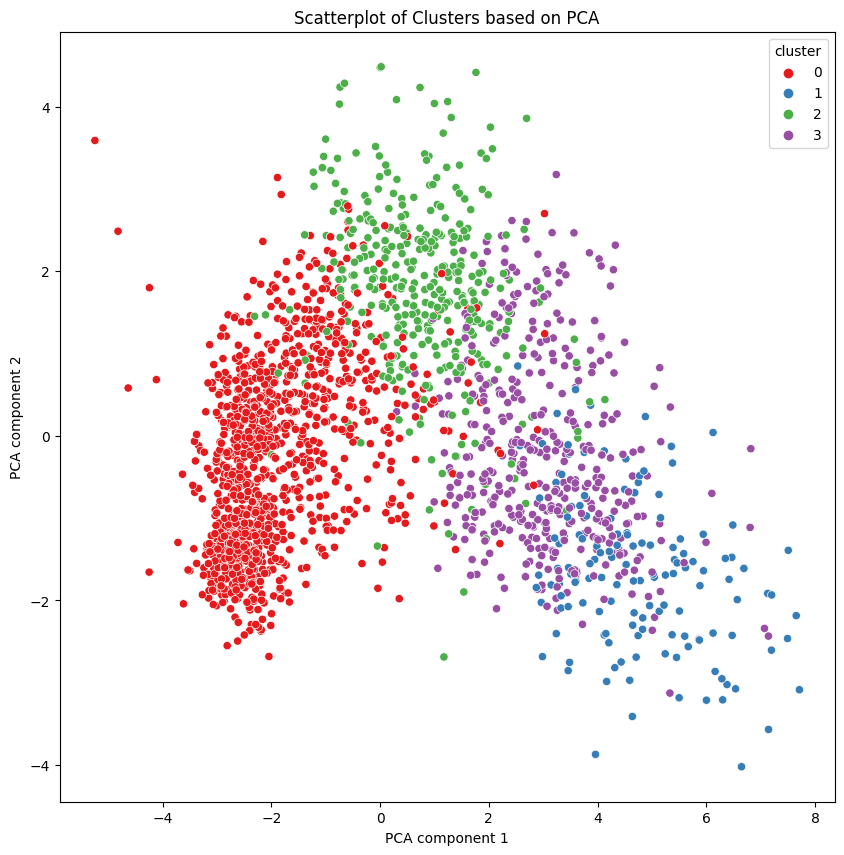

In [93]:
# Dataframe with the first two principal components from PCA and  cluster labels
princ_comp_df = pd.DataFrame(
    {"PC1": pca_data[:, 0], "PC2": pca_data[:, 1], "cluster": y_pred}
)

# Graph

plt.figure(figsize=(10, 10))
sns.scatterplot(
    data=princ_comp_df, x="PC1", y="PC2", hue="cluster", palette="Set1"
)
plt.title("Scatterplot of Clusters based on PCA")
plt.xlabel("PCA component 1")
plt.ylabel("PCA component 2")
plt.show()

In [94]:
def clustering_statistics(df, pred_data):
    clustered = pd.concat([df, pd.DataFrame({"cluster": pred_data})], axis=1)
    print("avg income")
    print("---------------------------------")
    print(clustered.groupby("cluster").income.mean())
    print()
    print("in_relationship")
    print("---------------------------------")
    print(
        clustered.groupby("cluster")
        .in_relationship.value_counts(normalize=True)
        .unstack()
    )
    print()
    print("amount spent")
    print("---------------------------------")
    print(
        clustered.groupby("cluster")[
            [
                "mntwines",
                "mntfruits",
                "mntmeatproducts",
                "mntfishproducts",
                "mntsweetproducts",
                "mntgoldprods",
            ]
        ]
        .mean()
        .T
    )
    print()
    print("number of purchases")
    print("---------------------------------")
    print(
        clustered.groupby("cluster")[
            [
                "numdealspurchases",
                "numwebpurchases",
                "numcatalogpurchases",
                "numstorepurchases",
            ]
        ]
        .mean()
        .T
    )
    print()
    print("age")
    print("---------------------------------")
    print(clustered.groupby("cluster")["year_birth"].describe().T)
    print()
    print("education")
    print("---------------------------------")
    print(
        clustered.groupby("cluster")["education"]
        .value_counts(normalize=True)
        .unstack()
    )
    print()

In [95]:
clustering_statistics(customer_df, y_pred)

avg income
---------------------------------
cluster
0    37923.588755
1    81337.689542
2    60659.174026
3    73098.865132
Name: income, dtype: float64

in_relationship
---------------------------------
in_relationship         0         1
cluster                            
0                0.357430  0.642570
1                0.457516  0.542484
2                0.350649  0.649351
3                0.320175  0.679825

amount spent
---------------------------------
cluster                   0           1           2           3
mntwines          85.435341  809.967320  541.524675  530.763158
mntfruits          7.338956   67.477124   19.625974   69.925439
mntmeatproducts   39.000000  511.535948  146.436364  418.315789
mntfishproducts   10.709237   96.411765   27.179221   99.782895
mntsweetproducts   7.182329   70.339869   20.451948   72.460526
mntgoldprods      22.413655   85.392157   56.638961   78.554825

number of purchases
---------------------------------
cluster                     

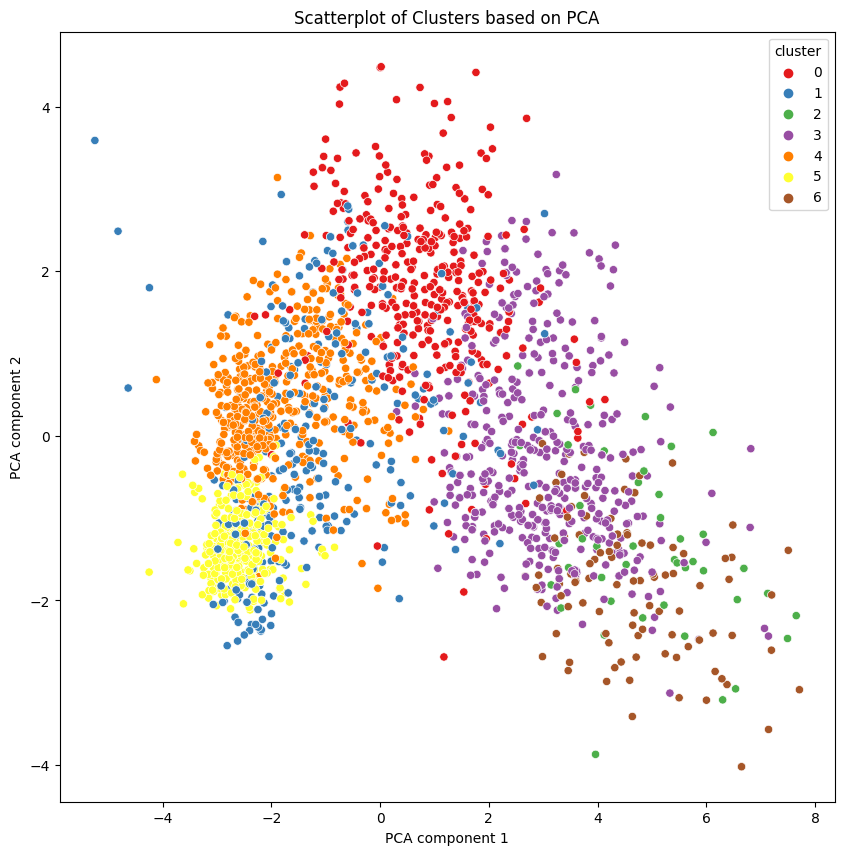

In [96]:
# Dataframe with the first two principal components from PCA and  cluster labels
princ_comp_df = pd.DataFrame(
    {"PC1": pca_data[:, 0], "PC2": pca_data[:, 1], "cluster": y_pred2}
)

# Graph
plt.figure(figsize=(10, 10))
sns.scatterplot(
    data=princ_comp_df, x="PC1", y="PC2", hue="cluster", palette="Set1"
)
plt.title("Scatterplot of Clusters based on PCA")
plt.xlabel("PCA component 1")
plt.ylabel("PCA component 2")
plt.show()

In [97]:
# Dataframe with the predicted clusters

clustered2 = pd.concat(
    [customer_df, pd.DataFrame({"cluster": y_pred2})], axis=1
)

clustered2.groupby("cluster").income.describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,385.0,60659.174026,10720.202597,4428.0,54803.00,60894.0,66476.00,94871.0
1,310.0,40192.532258,14434.610524,1730.0,31557.75,40326.5,49897.50,81300.0
2,52.0,81926.769231,11330.247383,48192.0,75777.00,83674.5,88496.25,102692.0
3,456.0,73098.865132,11839.701147,2447.0,67015.00,73059.0,79875.75,160803.0
4,545.0,43298.063303,15727.422821,6835.0,34487.00,43018.0,51287.00,162397.0
5,390.0,28609.585897,9747.242381,3502.0,22089.50,28433.5,34907.25,62499.0
6,101.0,81034.400990,11892.341855,51381.5,74538.00,80763.0,86857.00,157146.0


# Agglormerative Clustering

**The percentage of variance retained in the first 5 principal components is 0.526**

The variance kept by the first 5 primary components is a low amount of variance, meaning that the resulting clustering may not be accurate.

For more accurate results we would want a higher percentage of variance retained from the PCA, allowing our results to be more accurate to our initial dataset.

The dataset was clustered into 4 clusters and 7 clusters.

## Cluster Comparison
The 4 cluster solution appears to be a better solution than the 7 cluster solution. The 7 cluster solution appears to have a couple clusters which are very similar to each other, and the 4 cluster solution appears to have more distinct clusters.

The 4 cluster solution is a better option since the customer segments of the dataset are more distinct and feature more unique characteristics. In the 7 cluster solution, the characteristics of the segments are very similar and it would be difficult to define the segments.

The 4 cluster solution is picked over the 7 cluster solution and the customer segments are defined below.


## 4 Clusters

For the 4 clusters group, There are a couple distinct differences between the 4 clusters based on the dataset:

#### Cluster 0
Cluster 0 appears to be a segment of customers with lower income compared to the other three clusters (37923)

The segment of customers in cluster 0 have a higher number of web purchases compared to other clusters, and have the fewest catalog purchases.

This cluster appears to have a similar distribution of education levels as the other clusters, and the average age is similar to that of the whole dataset.

Overall, customers in cluster 0 spend less on all categories compared to the other clusters.

#### Cluster 1
Cluster 1 appears to be a segment of customers with higher income compared to the other three clusters (81337)

Compared to the other clusters, cluster 1 has a larger percentage of customers who are not in a relationship.

Cluster 1 customers also make the fewest deals puraches of all the clusters, and the most catalog purchases.

They also spend the largest amount on average on meats and wines.

Cluster 1 was also the youngest cluster with an average birthyear of 1972

#### Cluster 2
Cluster 2 had a similar income to cluster 3 (average income of 60659)

Cluster 2 spent more on wine and meat than other categories, however spent proportionally less one meat compared to the other three clusters.

They primarily make purchases on the web and in store, with more web purchases than any other cluster

Cluster 2 also has the highest percentage of customer who have a phd

Cluster 2 was also the oldest customer segment with an average birth year of 1962

#### Cluster 3
Cluster 3 had a similar income to cluster 2 (average income of 73098)

Cluster 3 made more purchases in store compared to other locations, and the most in store purchases out of all of the clusters.

They also spend the most on fish products compared to the other clusters.

This customer segment also had the most with education status of 2n cycle, indicating that it might have the greatest portion of students.







## Task 7 (20 points):
Conduct a k-means clustering of the data.  Pre-process the data using a 5-dimensional PCA (use one-hot encoding on your categorical values and remember to scale your data before doing the PCA). Use the average silhouette score to determine the optimal number of clusters and show the silhouette plot for the clustering solution using the optimal number of clusters.

Again, keep in mind that one of the goals of cluster analysis with this dataset is creating customer segments.  Can you define customer segments by examining the characteristics of each cluster? (Hint: a groupby() by cluster membership might be helpful here.)

Compare the results to the agglomerative clustering you did in the previous task.  Which solution do you prefer and why?

In [98]:
# Kmean pipeline for 4 clusters
kmeanpipe = Pipeline(
    [
        ("preprocessing_pca", pipe1),
        ("kmeans", KMeans(n_clusters=4, random_state=42)),
    ]
)

In [99]:
# Fit predict on our data
ky_pred = kmeanpipe.fit_predict(X)

In [100]:
# Silhouette score for 4 clusters
silhouette_score(pca_data, ky_pred)

0.3294901730373642

In [101]:
# Kmean pipeline for 7 clusters
kmeanpipe2 = Pipeline(
    [
        ("preprocessing_pca", pipe1),
        ("kmeans", KMeans(n_clusters=7, random_state=42)),
    ]
)

In [102]:
# Fit predict on our data
ky_pred2 = kmeanpipe2.fit_predict(X)

In [103]:
# Silhouette score for 7 clusters
silhouette_score(pca_data, ky_pred2)

0.2531137526876006

In [104]:
# Silhouette score for 4 clusters of agglomerative clustering
silhouette_score(pca_data, y_pred)

0.2965968629588494

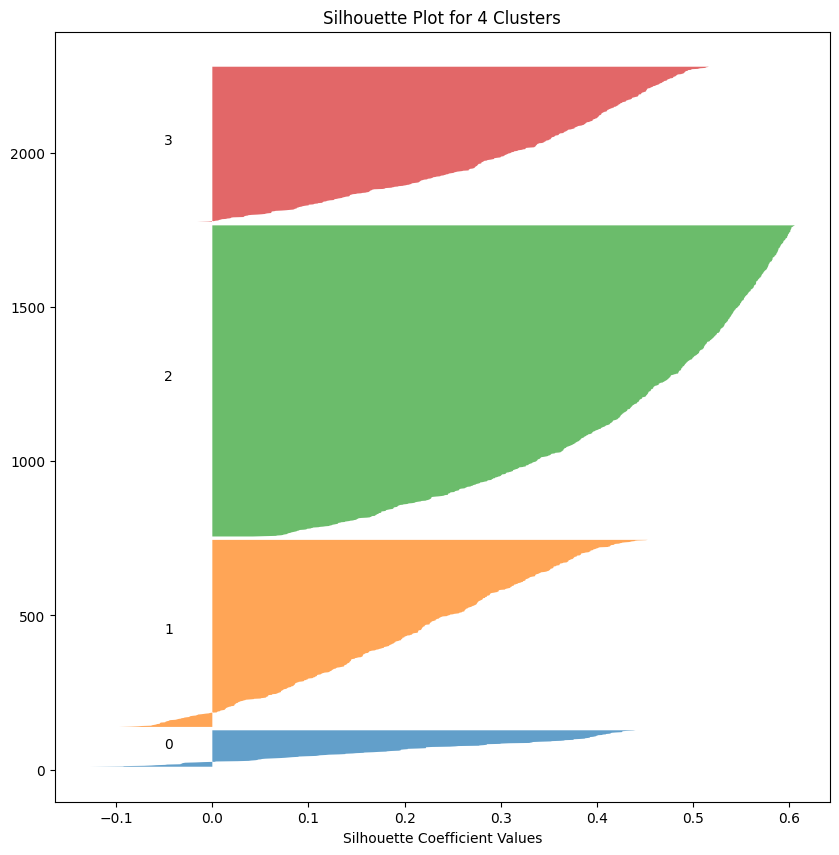

In [105]:
# Silhouette plot for 4 clusters
plt.figure(figsize=(10, 10))
plt.title("Silhouette Plot for 4 Clusters")
plt.xlabel("Silhouette Coefficient Values")

# Silhouette score for each sample
silhouette_plot = silhouette_samples(pca_data, ky_pred)
y_lower = 10
for i in range(4):
    # Combine scores in each cluster and sort them
    ith_cluster_silhouette_values = silhouette_plot[ky_pred == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    plt.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        alpha=0.7,
    )
    plt.text(
        -0.05,
        y_lower + 0.5 * size_cluster_i,
        str(i),
    )
    y_lower = y_upper + 10

In [106]:
clustering_statistics(customer_df, ky_pred)

avg income
---------------------------------
cluster
0    79561.247899
1    57176.084020
2    34536.573340
3    74058.184524
Name: income, dtype: float64

in_relationship
---------------------------------
in_relationship         0         1
cluster                            
0                0.369748  0.630252
1                0.317957  0.682043
2                0.360753  0.639247
3                0.386905  0.613095

amount spent
---------------------------------
cluster                    0           1          2           3
mntwines          938.319328  435.602965  38.728444  527.101190
mntfruits          45.596639   20.232290   4.940535   71.847222
mntmeatproducts   397.773109  127.733114  22.894945  448.373016
mntfishproducts    65.243697   27.955519   7.052527  103.571429
mntsweetproducts   53.033613   21.212521   5.019822   72.158730
mntgoldprods       70.369748   56.499176  15.299306   80.339286

number of purchases
---------------------------------
cluster                     

# Kmeans clustering of the data
Kmeans clustering was done on the dataset with 4 and 7 clusers. The results were then compared using the silhouette scores.

Similar to the Agglomerative Clustering, the 4 clusters were found to be more optimal.

The 4 cluster result had a higher silhouette score of 0.3295 compared to the 7 cluster result which had a silhouette score of 0.2531.<br>
*a higher score indicates that the clustering is more dense and that the clusters are better defined*

The results of 4 cluseter for kmeans clustering shows better results than the cluserting using aggloremative clustering. The clusters are more defined and the silhouette score is higher. The silhouette score for agglomerative clustering was 0.1433


## Kmean Customer Segments
The segment characteristics were similar to the agglomerative clustering results, however the characteristics were more distinct

#### Cluster 0
- High income (79561)
- High number of web, store and catalogue purchases
- More catalogue purchases than other segments
- high amount of wine and meat purchases

#### Cluster 1
- Middle income (57176)
- Oldest cluster  with average birthyear of 1963
- More deals and web purchases than other clusters

#### Cluster 2
- low income (34536)
- Youngest cluster with average birthyear of 1971
- The fewest amount of catalogue purchases
- Spends less on all catagories compared to other clusters
- proportionally higher sweet and fish purchases compared to other  clusters

#### Cluster 3
- High income (74058)
- Highest amount of spending on all catagories
- highest amount of spending on meat and fish
- Highest amount of customer with education graduation (likely the lowest education segment)





## Task 8 (10 points):
Show the results of a t-SNE analysis of the dataset.  Experiment with a variety of perplexity values and explain your final choice.  As with the previous questions, keep in mind that one of the goals of cluster analysis with this dataset is creating customer segments.  Can you define customer segments by examining the characteristics of each cluster?  How might you label the points in the t-SNE plot to show characteristics of each cluster?

In [107]:
preprocessor2 = ColumnTransformer(
    [
        ("cat", OneHotEncoder(), cat_attribs),
        ("num", StandardScaler(), num_attribs),
    ]
)

In [108]:
X_prep = preprocessor2.fit_transform(X)

In [109]:
tsne = TSNE(n_components=2, perplexity=80, random_state=42)
tsne_data = tsne.fit_transform(X_prep)

In [110]:
kmeans = KMeans(n_clusters=4, random_state=42)
y_pred = kmeans.fit_predict(tsne_data)

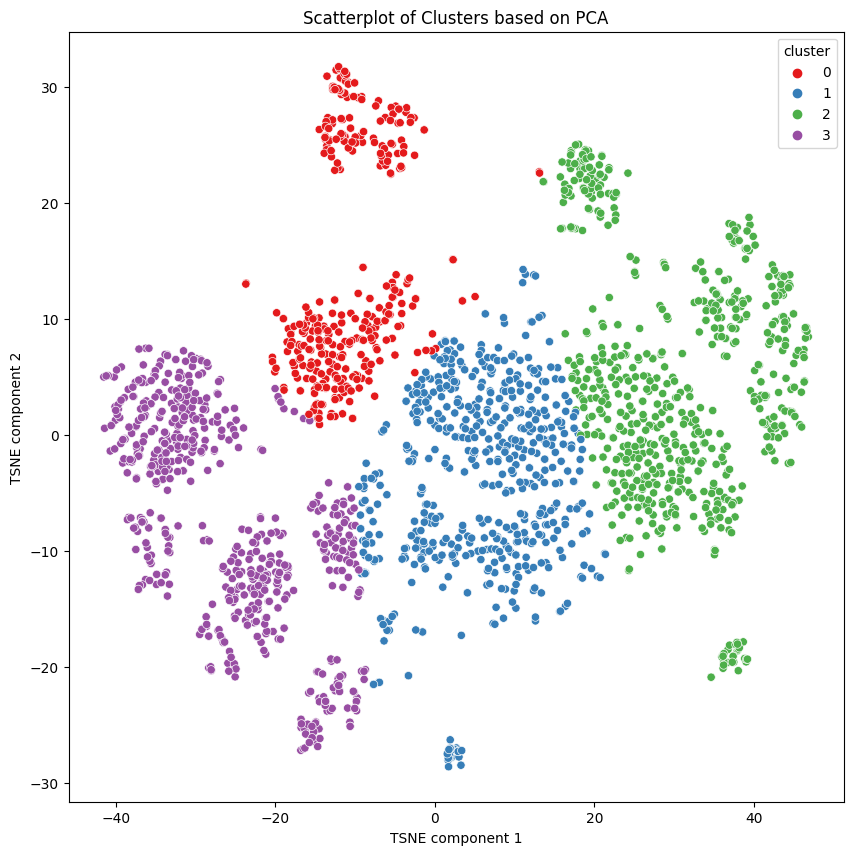

In [111]:
princ_comp_df = pd.DataFrame(
    {"TSNE1": tsne_data[:, 0], "TSNE2": tsne_data[:, 1], "cluster": y_pred}
)

# Graph
plt.figure(figsize=(10, 10))
sns.scatterplot(
    data=princ_comp_df, x="TSNE1", y="TSNE2", hue="cluster", palette="Set1"
)
plt.title("Scatterplot of Clusters based on PCA")
plt.xlabel("TSNE component 1")
plt.ylabel("TSNE component 2")
plt.show()

In [112]:
clustering_statistics(customer_df, y_pred)

avg income
---------------------------------
cluster
0    43999.548851
1    54290.699491
2    72992.327434
3    31359.833333
Name: income, dtype: float64

in_relationship
---------------------------------
in_relationship         0         1
cluster                            
0                0.137931  0.862069
1                0.392190  0.607810
2                0.359882  0.640118
3                0.437500  0.562500

amount spent
---------------------------------
cluster                    0           1           2          3
mntwines          161.278736  338.205433  595.274336  35.068910
mntfruits           7.968391   19.444822   60.238938   6.145833
mntmeatproducts    53.936782  115.351443  399.970501  25.733974
mntfishproducts    13.747126   25.439728   86.836283   8.663462
mntsweetproducts    9.017241   20.662139   61.215339   6.102564
mntgoldprods       32.729885   48.758913   71.777286  15.741987

number of purchases
---------------------------------
cluster                     

# TNSE and Kmeans clustering

Five preplexity values were tested: 80, 40, 20, 10, 5

At lower perplexity values, the clusters were less defined. The seperation between each cluster were less distinct and the clusters were more spread out. At 80 the clusters were more defined and the seperation between clusters was more distinct, however the overlap of clusters was greater. The perplexity of 40 was chosen as it gave the best balance of of the traits displayed by the higher and lower values.

## Customer Segments

The  customer segements were similar to those using kmeans clustering and PCA.

There was a high income segment, a segment which does not spend as much, a segment which makes more deals purchases, and a segment which spends more on fish and sweet products.

## Plot Labeling
If the points could be labeled with either the catagory of the points highest spending, or the catagory of the largest number of purchases. These variable were the most distinct between groups. The points could also be labeled with the cluster number, however this would be less descriptive than the other two options.

Labeling using the first two methods would allow you to see where the clustering of customer who spend the  most on a given catagory are located.  

# NOTE
We **strongly** recommend restarting your kernel and running your complete notebook from top to bottom
before submitting your work to Canvas in both HTML and IPYNB formats.